## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path='C:/Users/tejas/AI-ML Gen AI/Tejas-AI-ML Complete/Algerian_Forest_ML-project_Cloud/data/'

In [3]:
dataset=pd.read_csv(f'{data_path}/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [6]:
df[['Region']]=df[['Region']].astype(int)

In [7]:
## Removing the null values
df=df.dropna().reset_index(drop=True)

In [8]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [9]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [12]:
objects=[features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [14]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [15]:
df['Classes']=np.where(df['Classes'].str.contains(r"not.+"),'not fire','fire')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


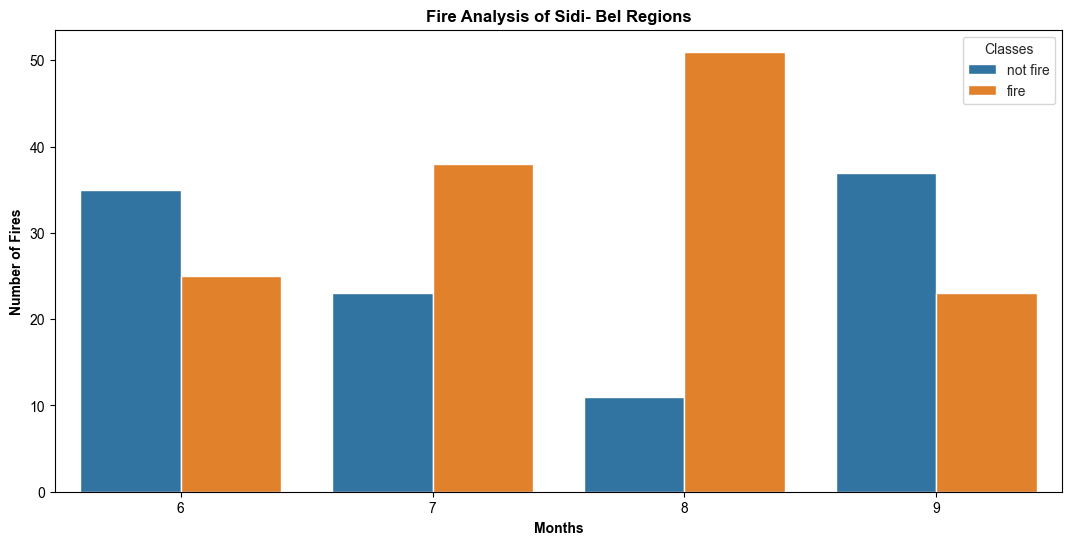

In [16]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.show()

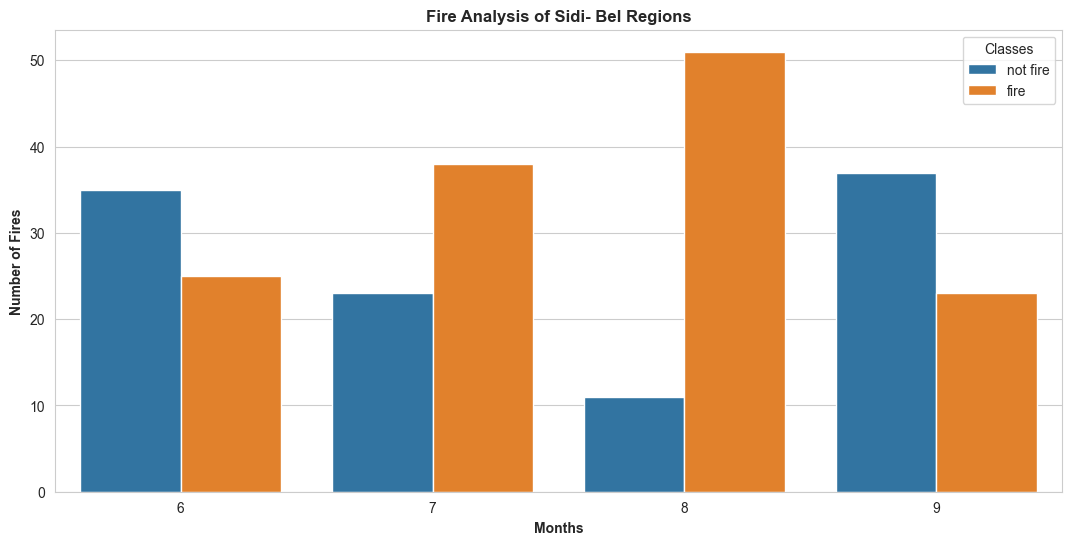

In [17]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.show()

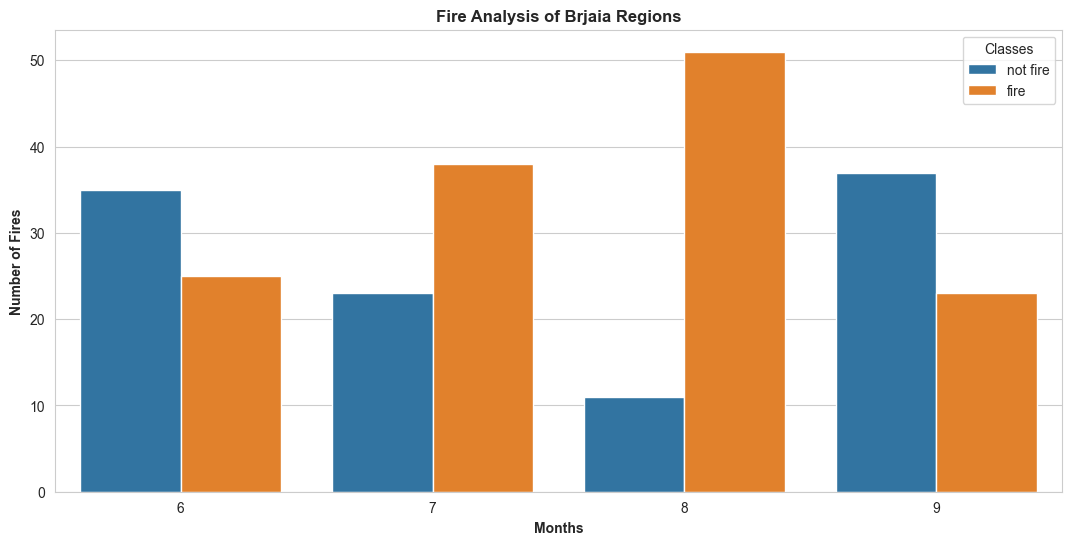

In [18]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')
plt.show()

In [19]:
df.to_csv(f'{data_path}/Algerian_forest_fires_cleaned_dataset.csv',index=False)

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

#### DataSet has been Cleaned  and saved

# Model Training With Cross Validation Using Lasso Regression

In [20]:
df=pd.read_csv(f"{data_path}/Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [22]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [24]:
df['Classes']=np.where(df['Classes'].str.contains(r"not.+"),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [25]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [26]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, y_train.shape

((194, 11), (194,))

In [28]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


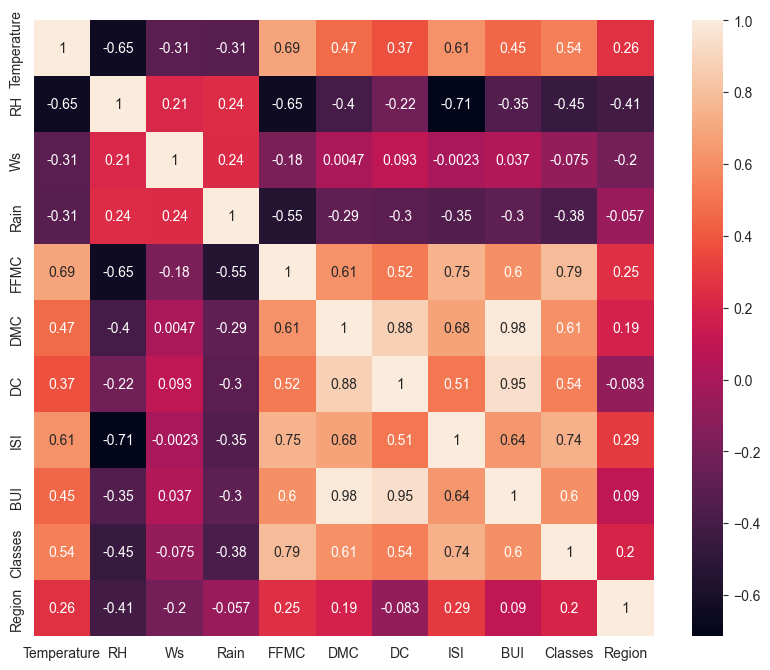

In [29]:
plt.figure(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [30]:
# function to threshold the correlation
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [31]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [32]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [33]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

## Feature Scaling Or Standardization

In [34]:
# feautre scaling and standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]], shape=(194, 9))

In [35]:
X_test_scaled

array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
        -0.07699537,  0.17532762,  0.8738629 , -1.01036297],
       [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
        -0.40637763,  0.33729694,  0.8738629 , -1.01036297],
       [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
        -0.91960114, -0.86590375, -1.14434427,  0.98974332],
       [ 0.49652155, -0.25379858, -0.99568804, -0.2841268 ,  0.09950881,
         0.26770699, -0.65765748, -1.14434427,  0.98974332],
       [-0.60120131,  0.21321832, -0.61544497, -0.38015572,  0.51840466,
         0.06088557, -0.10233408,  0.8738629 ,  0.98974332],
       [ 1.86867512,  0.14650162, -2.51666033,  0.1960178 , -0.30518719,
        -0.26849668, -0.88904223, -1.14434427,  0.98974332],
       [-1.15006273,  0.8803853 ,  0.14504117, -0.38015572,  0.29120691,
        -0.82768051, -0.37999578,  0.8738629 ,  0.98974332],
       [ 1.31981369, -1.72156595, -0.99568804, -0.09206896,  0

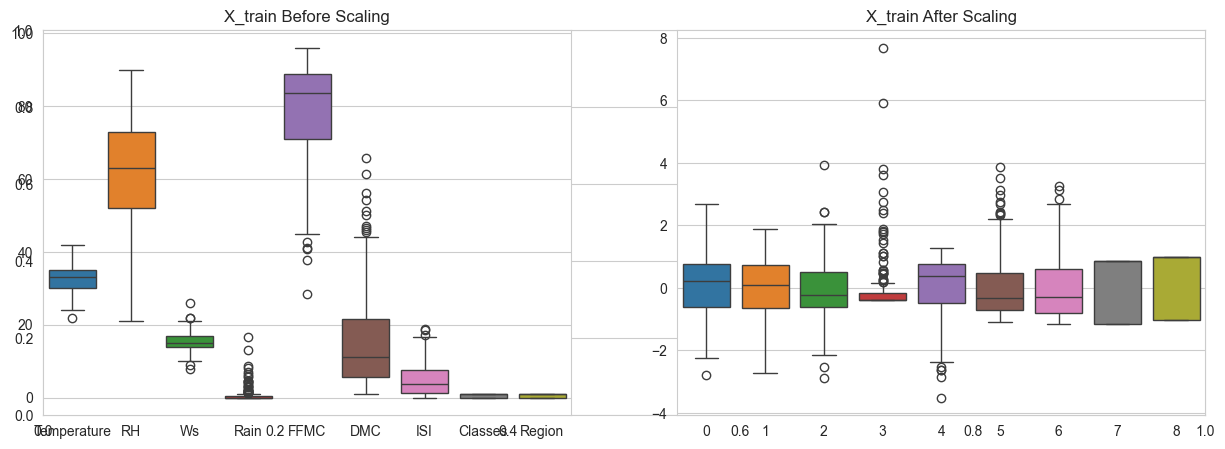

In [36]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

## Linear Regerssion

mae:  0.5049978694165663
accuracy (r2) 0.9805895859259883


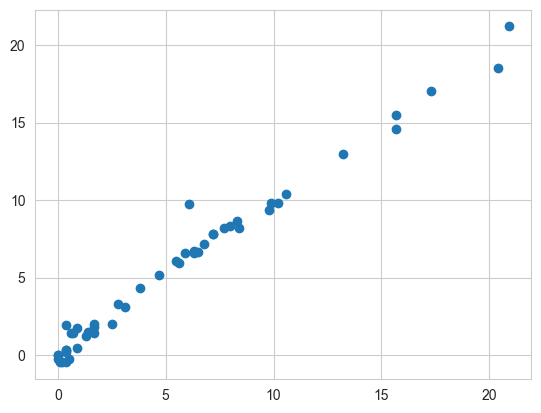

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
accuracyr2=r2_score(y_test,y_pred)
print("mae: ",mae)
print("accuracy (r2)",accuracyr2)
plt.scatter(y_test,y_pred)

plt.show()

## Lasso Regression model

mae:  1.0093958923873407
accuracy (r2) 0.9430507350726562


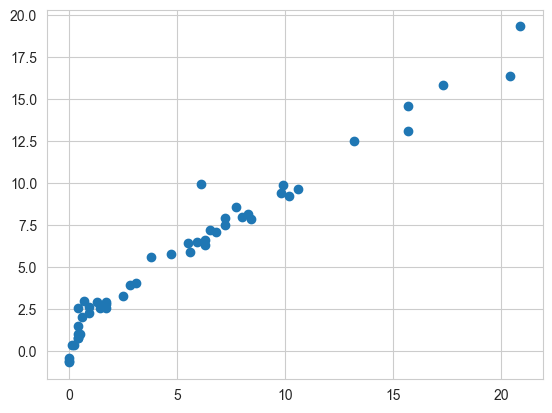

In [38]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso_reg=Lasso()
lasso_reg.fit(X_train_scaled,y_train)
y_pred=lasso_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
accuracyr2=r2_score(y_test,y_pred)
print("mae: ",mae)
print("accuracy (r2)",accuracyr2)
plt.scatter(y_test,y_pred)
plt.show()

## Cross validation Lasso

mae:  0.5556715031617872
accuracy (r2) 0.978328234520343


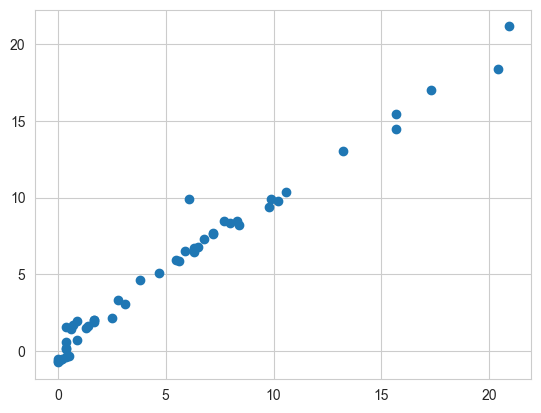

In [39]:

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
lassoCV_reg=LassoCV(cv=5)
lassoCV_reg.fit(X_train_scaled,y_train)
y_pred=lassoCV_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
accuracyr2=r2_score(y_test,y_pred)
print("mae: ",mae)
print("accuracy (r2)",accuracyr2)
plt.scatter(y_test,y_pred)
plt.show()

In [40]:
lassoCV_reg.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [41]:
lassoCV_reg.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.4648892 ,
        3.7300403 ,  4.88783146,  0.18134728, -0.31888586])

## ridge Regression model

mae:  0.5192048325844728
accuracy (r2) 0.9801058063273602


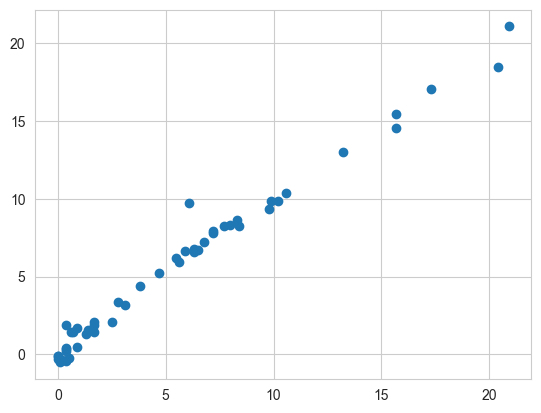

In [42]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
Ridge_reg=Ridge()
Ridge_reg.fit(X_train_scaled,y_train)
y_pred=Ridge_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
accuracyr2=r2_score(y_test,y_pred)
print("mae: ",mae)
print("accuracy (r2)",accuracyr2)
plt.scatter(y_test,y_pred)
plt.show()

## RidgeCV

mae:  0.68692620082771
accuracy (r2) 0.9722193780965628


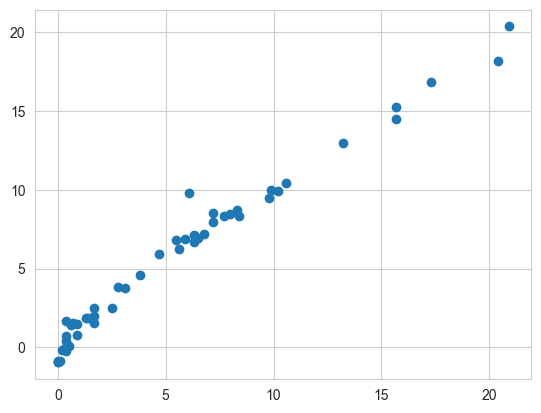

In [43]:

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
RidgeCV_reg=RidgeCV(cv=5)
RidgeCV_reg.fit(X_train_scaled,y_train)
y_pred=RidgeCV_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
accuracyr2=r2_score(y_test,y_pred)
print("mae: ",mae)
print("accuracy (r2)",accuracyr2)
plt.scatter(y_test,y_pred)
plt.show()

## Elastic Regression

mae:  1.6834416340136709
accuracy (r2) 0.8676961352267807


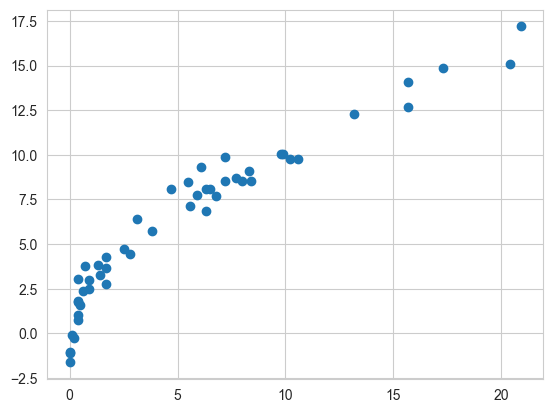

In [44]:

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic_reg=ElasticNet()
elastic_reg.fit(X_train_scaled,y_train)
y_pred=elastic_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
accuracyr2=r2_score(y_test,y_pred)
print("mae: ",mae)
print("accuracy (r2)",accuracyr2)
plt.scatter(y_test,y_pred)
plt.show()

## Elastic CV

mae:  0.5710147088777218
accuracy (r2) 0.9781014571778188


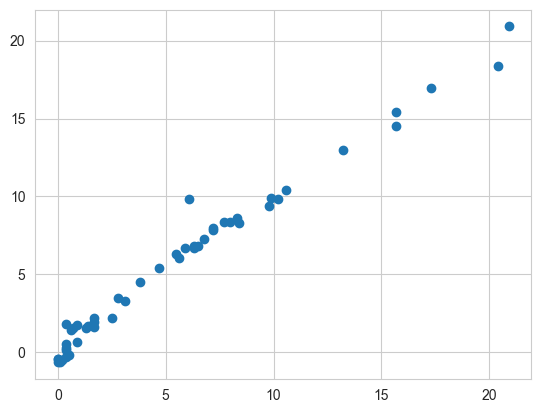

In [45]:

from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
elasticCV_reg=ElasticNetCV(cv=5)
elasticCV_reg.fit(X_train_scaled,y_train)
y_pred=elasticCV_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
accuracyr2=r2_score(y_test,y_pred)
print("mae: ",mae)
print("accuracy (r2)",accuracyr2)
plt.scatter(y_test,y_pred)
plt.show()

In [46]:
import pickle

In [47]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(linear,open('linear.pkl','wb'))
pickle.dump(Ridge_reg,open('ridge.pkl','wb'))
